In [1]:
#importing necesssary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras 
import tensorflow as tf 


In [43]:
#dataset (given in ipl_data.csv in the IPL Score Prediction repo
data = pd.read_csv(r'/Users/raman/Downloads/ipl_data.csv')


Exploratory Data Analysis

In [45]:
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [48]:
data.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [54]:
# Information (not-null count and data type) About Each Column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [50]:
# Number of Unique Values in each column
data.nunique()

mid               617
date              442
venue              35
bat_team           14
bowl_team          14
batsman           411
bowler            329
runs              252
wickets            11
overs             140
runs_last_5       102
wickets_last_5      8
striker           155
non-striker        88
total             138
dtype: int64

In [56]:
data.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

Data Cleaning

In [59]:
irrelevant = ['mid', 'date', 'venue','batsman', 'bowler', 'striker', 'non-striker']
print(f'Before Removing Irrelevant Columns : {data.shape}')
data = data.drop(irrelevant, axis=1) # Drop Irrelevant Columns
print(f'After Removing Irrelevant Columns : {data.shape}')
data.head()

Before Removing Irrelevant Columns : (76014, 15)
After Removing Irrelevant Columns : (76014, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [65]:
#removing inconsistent teams
# Define Consistent Teams
const_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
              'Delhi Daredevils', 'Sunrisers Hyderabad']

print(f'Before Removing Inconsistent Teams : {data.shape}')
data = data[(data['bat_team'].isin(const_teams)) & (data['bowl_team'].isin(const_teams))]
print(f'After Removing Irrelevant Columns : {data.shape}')
print(f"Consistent Teams : \n{data['bat_team'].unique()}")
data.head()

Before Removing Inconsistent Teams : (76014, 8)
After Removing Irrelevant Columns : (53811, 8)
Consistent Teams : 
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


<Axes: >

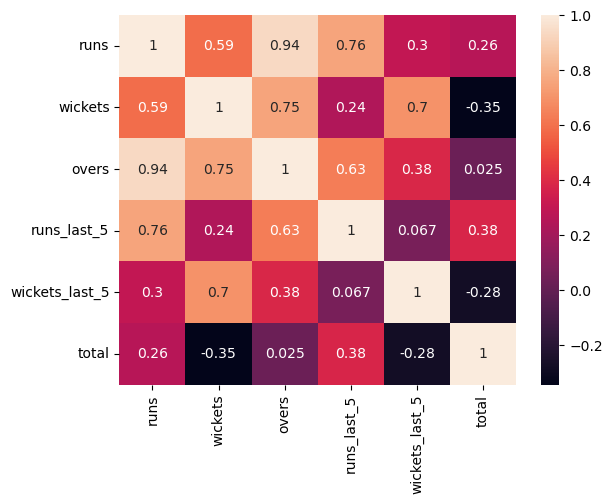

In [69]:
from seaborn import heatmap

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

corr_matrix = numeric_data.corr()
heatmap(data=corr_matrix, annot=True)


In [74]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
for col in ['bat_team', 'bowl_team']:
  data[col] = le.fit_transform(data[col])
data.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,3,6,1,0,0.1,1,0,222
1,3,6,1,0,0.2,1,0,222
2,3,6,2,0,0.2,2,0,222
3,3,6,2,0,0.3,2,0,222
4,3,6,2,0,0.4,2,0,222


In [76]:
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0, 1])], remainder='passthrough')

In [78]:
data = np.array(columnTransformer.fit_transform(data))

In [80]:
#Save the Numpy Array in a new DataFrame with transformed columns
cols = ['batting_team_Chennai Super Kings', 'batting_team_Delhi Daredevils', 'batting_team_Kings XI Punjab',
              'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
              'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad',
              'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Daredevils', 'bowling_team_Kings XI Punjab',
              'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
              'bowling_team_Royal Challengers Bangalore', 'bowling_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total']
df = pd.DataFrame(data, columns=cols)

In [82]:
# Visualize Encoded Data
df.head()

,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,...,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.1,1.0,0.0,222.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.2,1.0,0.0,222.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,0.2,2.0,0.0,222.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,0.3,2.0,0.0,222.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,0.4,2.0,0.0,222.0


In [84]:
features = df.drop(['total'], axis=1)
labels = df['total']

In [86]:
# Perform 80 : 20 Train-Test split
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)
print(f"Training Set : {train_features.shape}\nTesting Set : {test_features.shape}")

Training Set : (43048, 21)
Testing Set : (10763, 21)


In [179]:
# Keeping track of model perfomances
models = dict()

In [180]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

tree.fit(train_features, train_labels)

train_score_tree = str(tree.score(train_features, train_labels) * 100)
test_score_tree = str(tree.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["D-tree"] = test_score_tree

from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

print()
print("Model Evaluation: ")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, tree.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, tree.predict(test_features)))))

Train Score : 97.36%
Test Score : 66.66%

Model Evaluation: 
Mean Absolute Error (MAE): 7.113608792025591
Root Mean Squared Error (RMSE): 17.375267925283413


In [181]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(train_features, train_labels)

train_score_linreg = str(linreg.score(train_features, train_labels) * 100)
test_score_linreg = str(linreg.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_linreg[:5]}%\nTest Score : {test_score_linreg[:5]}%')
models["LinReg"] = test_score_linreg

print()
print("Model Evaluation: ")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, linreg.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, linreg.predict(test_features)))))

Train Score : 52.88%
Test Score : 52.54%

Model Evaluation: 
Mean Absolute Error (MAE): 15.475207420858787
Root Mean Squared Error (RMSE): 20.732506516569476


In [182]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

forest.fit(train_features, train_labels)

train_score_forest = str(forest.score(train_features, train_labels)*100)
test_score_forest = str(forest.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["RF"] = test_score_forest

print()
print("Model Evaluation: ")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, forest.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, forest.predict(test_features)))))

Train Score : 95.45%
Test Score : 80.01%

Model Evaluation: 
Mean Absolute Error (MAE): 7.387025657866966
Root Mean Squared Error (RMSE): 13.454803316407636


In [183]:
from sklearn.linear_model import LassoCV
lasso = LassoCV()

lasso.fit(train_features, train_labels)

train_score_lasso = str(lasso.score(train_features, train_labels)*100)
test_score_lasso = str(lasso.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_lasso[:5]}%\nTest Score : {test_score_lasso[:5]}%')
models["Lasso"] = test_score_lasso

print()
print("Model Evaluation: ")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, lasso.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, lasso.predict(test_features)))))

Train Score : 51.91%
Test Score : 51.47%

Model Evaluation: 
Mean Absolute Error (MAE): 15.49282161185642
Root Mean Squared Error (RMSE): 20.964793164294257


In [184]:
from sklearn.svm import SVR
svm = SVR()

svm.fit(train_features, train_labels)

train_score_svm = str(svm.score(train_features, train_labels)*100)
test_score_svm = str(svm.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_svm[:5]}%\nTest Score : {test_score_svm[:5]}%')
models["SVM"] = test_score_svm 

print()
print("Model Evaluation: ")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, svm.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, svm.predict(test_features)))))

Train Score : 46.37%
Test Score : 45.71%

Model Evaluation: 
Mean Absolute Error (MAE): 16.533221398905
Root Mean Squared Error (RMSE): 22.173122814781866


In [185]:
from sklearn.neural_network import MLPRegressor
neural_net = MLPRegressor(activation='logistic', max_iter=500)

neural_net.fit(train_features, train_labels)

train_score_neural_net = str(neural_net.score(train_features, train_labels)*100)
test_score_neural_net = str(neural_net.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_neural_net[:5]}%\nTest Score : {test_score_neural_net[:5]}%')
models["MLP(NN)"] = test_score_neural_net 

print()
print("Model Evaluation: ")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, neural_net.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, neural_net.predict(test_features)))))

Train Score : 73.62%
Test Score : 72.10%

Model Evaluation: 
Mean Absolute Error (MAE): 11.106265363863212
Root Mean Squared Error (RMSE): 15.896448375882033


Best Model Selection

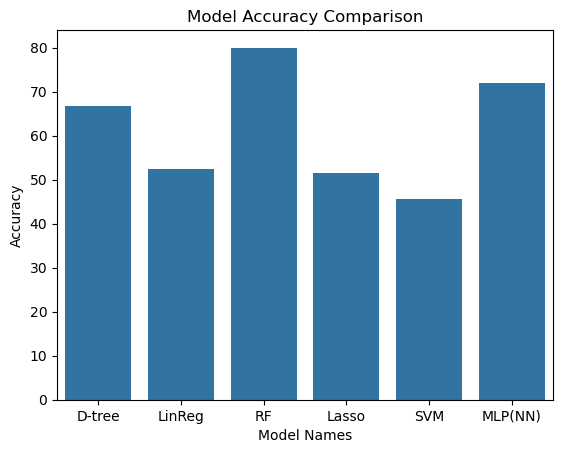

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

model_names = list(models.keys())
accuracy = list(map(float, models.values()))

sns.barplot(x=model_names, y=accuracy)

plt.xlabel('Model Names')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

plt.show()


In [195]:
def predict_score(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model=forest):
  prediction_array = []

  if batting_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]

  if bowling_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  prediction_array = prediction_array + [runs, wickets, overs, runs_last_5, wickets_last_5]
  prediction_array = np.array([prediction_array])
  pred = model.predict(prediction_array)
  return int(round(pred[0]))

In [197]:
batting_team='Delhi Daredevils'
bowling_team='Chennai Super Kings'
score = predict_score(batting_team, bowling_team, overs=10.2, runs=68, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 147')

Predicted Score : 145 || Actual Score : 147


In [201]:
batting_team="Kolkata Knight Riders"
bowling_team="Chennai Super Kings"
score = predict_score(batting_team, bowling_team, overs=18.0, runs=150, wickets=4, runs_last_5=57, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 172')

Predicted Score : 174 || Actual Score : 172
